In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [115]:
# mydateparser = lambda x: pd.datetime.strptime(x, "%Y %m %d %H:%M:%S")
# df = pd.read_csv("file.csv", sep='\t', names=['date_column', 'other_column'], parse_dates=['date_column'], date_parser=mydateparser)

df_covid = pd.read_csv("./input/covid_19_clear.csv", parse_dates=['Date'], infer_datetime_format=True)
df_country_info = pd.read_csv("./country_info.csv")

In [116]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8664 entries, 0 to 8663
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Country    8664 non-null   object        
 1   Date       8664 non-null   datetime64[ns]
 2   Confirmed  8664 non-null   int64         
 3   Deaths     8664 non-null   int64         
 4   Recovered  8664 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 338.6+ KB


In [117]:
df_covid

,Country,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01-22,0,0,0
1,Afghanistan,2020-01-23,0,0,0
2,Afghanistan,2020-01-24,0,0,0
3,Afghanistan,2020-01-25,0,0,0
4,Afghanistan,2020-01-26,0,0,0
...,...,...,...,...,...
8659,Zambia,2020-03-05,0,0,0
8660,Zambia,2020-03-06,0,0,0
8661,Zambia,2020-03-07,0,0,0
8662,Zambia,2020-03-08,0,0,0


# Combinando os dados

In [39]:
covid_top_50 = df_covid[df_covid["Date"] == '3/18/20'].sort_values(by=['Confirmed', 'Deaths', 'Recovered'], ascending=False).head(55).Country.values

In [40]:
coutries = df_country_info.Country.values

In [41]:
df_country_info

,Country,Age 0-9,Age 10-19,Age 20-29,Age 30-39,Age 40-49,Age 50-59,Age 60-69,Age 70-79,Age >80,# People,GDP,GDP per capta,Life expectancy,# Flight Passengers
0,Slovakia,568394,542764,680528,860773,843980,714201,687712,380061,122175,540.0588,1.700908e+11,19897.153507,77.219,NaN
1,Sweden,1191245,1106232,1304961,1289302,1277210,1280608,1097278,967449,362698,987.6983,4.859173e+11,56935.188270,82.516,NaN
2,Indonesia,47977486,46310084,43068836,41353654,37293402,28325635,16650777,7276648,1791671,27004.8193,3.106463e+12,4130.663276,71.282,1.151541e+08
3,Switzerland,875799,835663,1047321,1211148,1177086,1309842,953874,731996,307204,844.9933,5.051785e+11,76667.444040,83.473,2.885799e+07
4,Singapore,473440,525276,841606,898862,965359,946886,762636,260127,92128,576.6320,5.079963e+11,55235.512886,83.279,4.040152e+07
5,Qatar,268598,230385,719809,819308,462935,238779,74010,14279,2975,283.1078,3.132168e+11,65696.387132,79.981,2.917892e+07
6,Canada,3960088,3974074,5110382,5204909,4797691,5260069,4598419,2876627,1119713,3690.1972,1.633483e+12,51315.888975,82.210,8.938000e+07
7,India,236731829,252674336,238481457,212399683,165881490,125378954,84296275,37500685,9615035,136295.9744,9.317083e+12,1963.546321,69.165,1.640356e+08
8,South Korea,4240885,4886624,6797905,7196849,8330006,8442921,6135717,3444643,1251462,5072.7012,1.898965e+12,26152.030775,82.628,8.815758e+07
9,France,7606630,7857054,7415448,8007883,8408482,8600917,7758713,5456311,2705071,6381.6509,2.649717e+12,42567.743648,82.432,7.018803e+07


In [42]:
for country in covid_top_50:
    if country not in coutries:
        print("Falta país: {}".format(country))

Falta país: Cruise Ship
Falta país: San Marino


In [43]:
df  = pd.merge(df_covid, df_country_info, left_on='Country', right_on='Country', how='inner', suffixes=('', ''))


# Correlacionando os dados

In [45]:
df.corr()

,Confirmed,Deaths,Recovered,Age 0-9,Age 10-19,Age 20-29,Age 30-39,Age 40-49,Age 50-59,Age 60-69,Age 70-79,Age >80,# People,GDP,GDP per capta,Life expectancy,# Flight Passengers
Confirmed,1.000000,0.969734,0.877637,0.463392,0.435427,0.506394,0.594281,0.665069,0.718496,0.716605,0.696926,0.650228,0.590405,0.620592,-0.117340,-0.029998,0.446806
Deaths,0.969734,1.000000,0.903841,0.423396,0.397715,0.462429,0.543075,0.607964,0.656530,0.654667,0.637451,0.596320,0.539494,0.568103,-0.112311,-0.026434,0.401844
Recovered,0.877637,0.903841,1.000000,0.383830,0.360558,0.418498,0.490238,0.547523,0.590514,0.588386,0.569925,0.527418,0.486623,0.503169,-0.099782,-0.039585,0.362563
Age 0-9,0.463392,0.423396,0.383830,1.000000,0.997953,0.995969,0.976915,0.943005,0.898392,0.885021,0.859148,0.772077,0.977914,0.703006,-0.319056,-0.414995,0.464898
Age 10-19,0.435427,0.397715,0.360558,0.997953,1.000000,0.994601,0.970344,0.932313,0.883861,0.870833,0.846382,0.760634,0.971466,0.690010,-0.302232,-0.393551,0.457365
Age 20-29,0.506394,0.462429,0.418498,0.995969,0.994601,1.000000,0.989907,0.964251,0.927058,0.915985,0.892046,0.808495,0.990501,0.741711,-0.296101,-0.369483,0.505870
Age 30-39,0.594281,0.543075,0.490238,0.976915,0.970344,0.989907,1.000000,0.991430,0.969321,0.960584,0.936681,0.857611,0.999318,0.790979,-0.289036,-0.335996,0.547774
Age 40-49,0.665069,0.607964,0.547523,0.943005,0.932313,0.964251,0.991430,1.000000,0.992525,0.986217,0.965575,0.892938,0.990982,0.828379,-0.270587,-0.288034,0.586622
Age 50-59,0.718496,0.656530,0.590514,0.898392,0.883861,0.927058,0.969321,0.992525,1.000000,0.997494,0.980513,0.917360,0.969347,0.863208,-0.244523,-0.242824,0.632737
Age 60-69,0.716605,0.654667,0.588386,0.885021,0.870833,0.915985,0.960584,0.986217,0.997494,1.000000,0.990300,0.939954,0.961927,0.891028,-0.228306,-0.222233,0.671701


In [80]:
df_teste = df[['Country', 'Date', 'Confirmed', 'Recovered', 'Deaths', 'GDP', 'GDP per capta', 'Life expectancy', '# Flight Passengers']]

In [81]:
df_teste = df_teste[df_teste['Date'] == '3/18/20']

In [88]:
df_teste['% pop abaixo 50'] = (df['Age 0-9'] + df['Age 10-19'] + df['Age 20-29'] + df['Age 30-39'] + df['Age 40-49'])
df_teste['% pop acima 50'] = (df['Age 50-59'] + df['Age 60-69'] + df['Age 70-79'] + df['Age >80'])
df_teste['% pop acima 60'] = (df['Age 60-69'] + df['Age 70-79'] + df['Age >80'])
df_teste['% pop acima 70'] = (df['Age 70-79'] + df['Age >80'])
df_teste['% pop acima 80'] = (df['Age >80'])

In [89]:
df_teste

,Country,Date,Confirmed,Recovered,Deaths,GDP,GDP per capta,Life expectancy,# Flight Passengers,% pop abaixo 50,% pop acima 50,% pop acima 60,% pop acima 70,% pop acima 80
48,Australia,3/18/20,568,23,6,1.134098e+12,55925.931817,83.122,7.566765e+07,16706081,8176329,5082676,2477659,709000
105,Austria,3/18/20,1646,9,4,4.092673e+11,49129.233665,81.340,1.293550e+07,5284637,3531361,2128417,1128001,338138
162,Bahrain,3/18/20,256,88,1,6.587424e+10,22111.477237,77.032,5.877003e+06,1420290,219619,82573,21305,4399
219,Belgium,3/18/20,1486,31,14,4.977980e+11,46078.929087,81.305,1.363949e+07,7022261,4303147,2701256,1353560,444835
276,Brazil,3/18/20,372,2,3,2.991791e+12,10888.982385,75.456,1.021100e+08,158341756,51590519,27563911,11271726,2870636
333,Canada,3/18/20,657,9,8,1.633483e+12,51315.888975,82.210,8.938000e+07,23047144,13854828,8594759,3996340,1119713
390,Chile,3/18/20,238,0,0,4.284072e+11,15059.530141,79.909,1.951718e+07,13412377,5380570,3051985,1314639,364300
447,China,3/18/20,81102,69755,3241,2.253685e+13,7329.089299,76.470,6.114398e+08,977698106,448714941,234091129,85670538,18775767
504,Czech Republic,3/18/20,464,3,0,3.552755e+11,22779.291899,79.058,5.727200e+06,6583496,3961200,2628073,1283185,295858
561,Denmark,3/18/20,1115,1,4,2.807091e+11,61582.166069,80.681,NaN,3477521,2218214,1414269,757085,190139


In [90]:
df_teste.corr()

,Confirmed,Recovered,Deaths,GDP,GDP per capta,Life expectancy,# Flight Passengers,% pop abaixo 50,% pop acima 50,% pop acima 60,% pop acima 70,% pop acima 80
Confirmed,1.000000,0.909578,0.929781,0.706801,-0.095545,0.068246,0.510482,0.544107,0.753794,0.754813,0.750970,0.737505
Recovered,0.909578,1.000000,0.754133,0.714973,-0.148020,-0.049256,0.511040,0.626252,0.831631,0.823619,0.798179,0.749741
Deaths,0.929781,0.754133,1.000000,0.550089,-0.115250,0.066621,0.354815,0.431823,0.598692,0.598889,0.597363,0.589250
GDP,0.706801,0.714973,0.550089,1.000000,-0.111560,-0.121452,0.919453,0.756931,0.890000,0.910669,0.933933,0.946555
GDP per capta,-0.095545,-0.148020,-0.115250,-0.111560,1.000000,0.686710,0.075347,-0.298536,-0.228538,-0.213051,-0.185149,-0.146451
Life expectancy,0.068246,-0.049256,0.066621,-0.121452,0.686710,1.000000,-0.002381,-0.364836,-0.220784,-0.199825,-0.160053,-0.102672
# Flight Passengers,0.510482,0.511040,0.354815,0.919453,0.075347,-0.002381,1.000000,0.516454,0.668830,0.698865,0.737014,0.773332
% pop abaixo 50,0.544107,0.626252,0.431823,0.756931,-0.298536,-0.364836,0.516454,1.000000,0.933115,0.920790,0.892549,0.825167
% pop acima 50,0.753794,0.831631,0.598692,0.890000,-0.228538,-0.220784,0.668830,0.933115,1.000000,0.998015,0.984413,0.942199
% pop acima 60,0.754813,0.823619,0.598889,0.910669,-0.213051,-0.199825,0.698865,0.920790,0.998015,1.000000,0.993276,0.960853


# Visualizações dos dados mundiais

### Status 18/03/2020

In [118]:
covid_today = df_covid[df_covid["Date"] == '2020-03-18']

In [119]:
print("Total number of confirmed cases:", covid_today.sum()['Confirmed'])
print("Total number of deaths:", covid_today.sum()['Deaths'])
print("Total number of recovered cases:", covid_today.sum()['Recovered'])
print("% of death: {:.3f}%".format(100 * covid_today.sum()['Deaths'] / covid_today.sum()['Confirmed']))

Total number of confirmed cases: 214910
Total number of deaths: 8733
Total number of recovered cases: 83207
% of death: 4.064%


In [120]:
covid_per_date = df_covid.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]

In [121]:
covid_per_date.sort_values(by='Confirmed', inplace=True)

[Text(0, 0.5, '# of Cases'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'COVID-19 in the World')]

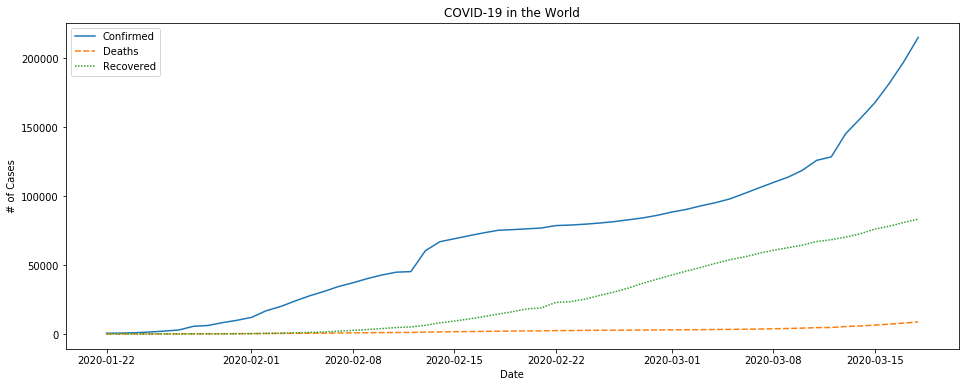

In [122]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(data=covid_per_date, sort=False)
ax.set(xlabel='Date', ylabel='# of Cases', title='COVID-19 in the World')

# Visualizações dos dados do Brasil


### Status 18/03/2020

In [123]:
covid_br_today = covid_today[covid_today["Country"] == 'Brazil']

In [124]:
print("Total number of confirmed cases:", covid_br_today.sum()['Confirmed'])
print("Total number of deaths:", covid_br_today.sum()['Deaths'])
print("Total number of recovered cases:", covid_br_today.sum()['Recovered'])
print("% of death: {:.3f}%".format(100 * covid_br_today.sum()['Deaths'] / covid_br_today.sum()['Confirmed']))

Total number of confirmed cases: 372
Total number of deaths: 3
Total number of recovered cases: 2
% of death: 0.806%


In [126]:
covid_br_per_date = df_covid[df_covid['Country'] == 'Brazil']
covid_br_per_date = covid_br_per_date.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]

In [129]:
covid_br_per_date.sort_values(by='Date', inplace=True)

[Text(0, 0.5, '# of Cases'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'COVID-19 in Brazil')]

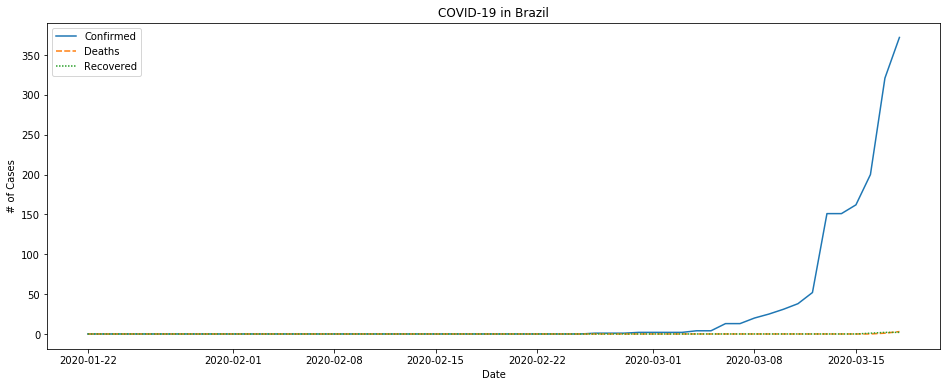

In [130]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(data=covid_br_per_date, sort=False)
ax.set(xlabel='Date', ylabel='# of Cases', title='COVID-19 in Brazil')